In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sys
import os
sys.path.append(os.path.abspath('../'))


from scripts.data_loader import load_data
from scripts.data_cleaning import merge_all

data = load_data()
mf = merge_all(data)
mf.head()

,sale_id,sale_date,store_id,product_id,quantity,Product_ID,Product_Name,Category_ID,Launch_Date,Price,Store_ID,Store_Name,City,Country,category_id,category_name,claim_id,claim_date,repair_status
0,YG-8782,16-06-2023,ST-10,P-38,10,P-38,iPhone 13 Pro,CAT-4,2021-03-22,308,ST-10,Apple South Coast Plaza,Costa Mesa,United States,CAT-4,Smartphone,CL-58750,2024-01-30,Completed
1,QX-999001,13-04-2022,ST-63,P-48,10,P-48,Apple Watch Nike Edition,CAT-5,2020-06-24,884,ST-63,Apple Parque La Colina,Bogota,Colombia,CAT-5,Wearable,CL-8874,2024-06-25,Pending
2,JG-46890,05-07-2021,ST-26,P-79,5,P-79,Magic Trackpad,CAT-10,2024-05-25,1242,ST-26,Apple Leidseplein,Amsterdam,Netherlands,CAT-10,Accessories,CL-14486,2024-08-13,Pending
3,XJ-1731,20-07-2022,ST-15,P-24,9,P-24,iPad mini (6th Generation),CAT-3,2022-11-27,573,ST-15,Apple Downtown Brooklyn,Brooklyn,United States,CAT-3,Tablet,CL-42187,2024-09-19,Pending
4,FG-95080,18-03-2022,ST-35,P-69,7,P-69,Apple TV+,CAT-8,2024-11-04,404,ST-35,Apple Shanghai IFC,Shanghai,China,CAT-8,Subscription Service,CL-37590,2024-09-16,Completed


In [3]:
print("=== Dataset Info ===")
print(mf.info())
print("\nNumber of rows:", mf.shape[0])
print("Number of columns:", mf.shape[1])

mf.head()


=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040200 entries, 0 to 1040199
Data columns (total 19 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   sale_id        1040200 non-null  object
 1   sale_date      1040200 non-null  object
 2   store_id       1040200 non-null  object
 3   product_id     1040200 non-null  object
 4   quantity       1040200 non-null  int64 
 5   Product_ID     1040200 non-null  object
 6   Product_Name   1040200 non-null  object
 7   Category_ID    1040200 non-null  object
 8   Launch_Date    1040200 non-null  object
 9   Price          1040200 non-null  int64 
 10  Store_ID       1040200 non-null  object
 11  Store_Name     1040200 non-null  object
 12  City           1040200 non-null  object
 13  Country        1040200 non-null  object
 14  category_id    1040200 non-null  object
 15  category_name  1040200 non-null  object
 16  claim_id       30000 non-null    object
 17  claim_

,sale_id,sale_date,store_id,product_id,quantity,Product_ID,Product_Name,Category_ID,Launch_Date,Price,Store_ID,Store_Name,City,Country,category_id,category_name,claim_id,claim_date,repair_status
0,YG-8782,16-06-2023,ST-10,P-38,10,P-38,iPhone 13 Pro,CAT-4,2021-03-22,308,ST-10,Apple South Coast Plaza,Costa Mesa,United States,CAT-4,Smartphone,CL-58750,2024-01-30,Completed
1,QX-999001,13-04-2022,ST-63,P-48,10,P-48,Apple Watch Nike Edition,CAT-5,2020-06-24,884,ST-63,Apple Parque La Colina,Bogota,Colombia,CAT-5,Wearable,CL-8874,2024-06-25,Pending
2,JG-46890,05-07-2021,ST-26,P-79,5,P-79,Magic Trackpad,CAT-10,2024-05-25,1242,ST-26,Apple Leidseplein,Amsterdam,Netherlands,CAT-10,Accessories,CL-14486,2024-08-13,Pending
3,XJ-1731,20-07-2022,ST-15,P-24,9,P-24,iPad mini (6th Generation),CAT-3,2022-11-27,573,ST-15,Apple Downtown Brooklyn,Brooklyn,United States,CAT-3,Tablet,CL-42187,2024-09-19,Pending
4,FG-95080,18-03-2022,ST-35,P-69,7,P-69,Apple TV+,CAT-8,2024-11-04,404,ST-35,Apple Shanghai IFC,Shanghai,China,CAT-8,Subscription Service,CL-37590,2024-09-16,Completed


In [4]:
df = mf.copy()
df.head()

,sale_id,sale_date,store_id,product_id,quantity,Product_ID,Product_Name,Category_ID,Launch_Date,Price,Store_ID,Store_Name,City,Country,category_id,category_name,claim_id,claim_date,repair_status
0,YG-8782,16-06-2023,ST-10,P-38,10,P-38,iPhone 13 Pro,CAT-4,2021-03-22,308,ST-10,Apple South Coast Plaza,Costa Mesa,United States,CAT-4,Smartphone,CL-58750,2024-01-30,Completed
1,QX-999001,13-04-2022,ST-63,P-48,10,P-48,Apple Watch Nike Edition,CAT-5,2020-06-24,884,ST-63,Apple Parque La Colina,Bogota,Colombia,CAT-5,Wearable,CL-8874,2024-06-25,Pending
2,JG-46890,05-07-2021,ST-26,P-79,5,P-79,Magic Trackpad,CAT-10,2024-05-25,1242,ST-26,Apple Leidseplein,Amsterdam,Netherlands,CAT-10,Accessories,CL-14486,2024-08-13,Pending
3,XJ-1731,20-07-2022,ST-15,P-24,9,P-24,iPad mini (6th Generation),CAT-3,2022-11-27,573,ST-15,Apple Downtown Brooklyn,Brooklyn,United States,CAT-3,Tablet,CL-42187,2024-09-19,Pending
4,FG-95080,18-03-2022,ST-35,P-69,7,P-69,Apple TV+,CAT-8,2024-11-04,404,ST-35,Apple Shanghai IFC,Shanghai,China,CAT-8,Subscription Service,CL-37590,2024-09-16,Completed


In [5]:
print("\n=== Duplicate Rows ===")
duplicates = mf.duplicated().sum()
print(f"Total duplicate rows: {duplicates}")

print("\n=== Missing Values ===")
missing_values = mf.isnull().sum()
print(missing_values[missing_values > 0])



=== Duplicate Rows ===
Total duplicate rows: 0

=== Missing Values ===
claim_id         1010200
claim_date       1010200
repair_status    1010200
dtype: int64


In [6]:
print("\n=== Inconsistent Column Names (Possible Duplicates) ===")
cols_lower = [c.lower() for c in mf.columns]
duplicates_in_columns = [c for c in set(cols_lower) if cols_lower.count(c) > 1]
print(duplicates_in_columns)

print("\n=== Data Types ===")
print(mf.dtypes)



=== Inconsistent Column Names (Possible Duplicates) ===
['product_id', 'store_id', 'category_id']

=== Data Types ===
sale_id          object
sale_date        object
store_id         object
product_id       object
quantity          int64
Product_ID       object
Product_Name     object
Category_ID      object
Launch_Date      object
Price             int64
Store_ID         object
Store_Name       object
City             object
Country          object
category_id      object
category_name    object
claim_id         object
claim_date       object
repair_status    object
dtype: object


In [7]:
print("\n=== Summary Statistics ===")
print(mf.describe(include='all'))

print("\n=== Unique Values per Column ===")
for col in mf.columns:
    unique_values = mf[col].nunique()
    print(f"{col}: {unique_values} unique values")

print("\n=== Sample Data ===")
print(mf.sample(5))



=== Summary Statistics ===
        sale_id   sale_date store_id product_id      quantity Product_ID  \
count   1040200     1040200  1040200    1040200  1.040200e+06    1040200   
unique  1040200        1778       75         89           NaN         89   
top     YG-8782  10-08-2022    ST-30       P-60           NaN       P-60   
freq          1         661    14113      11893           NaN      11893   
mean        NaN         NaN      NaN        NaN  5.500235e+00        NaN   
std         NaN         NaN      NaN        NaN  2.874295e+00        NaN   
min         NaN         NaN      NaN        NaN  1.000000e+00        NaN   
25%         NaN         NaN      NaN        NaN  3.000000e+00        NaN   
50%         NaN         NaN      NaN        NaN  5.000000e+00        NaN   
75%         NaN         NaN      NaN        NaN  8.000000e+00        NaN   
max         NaN         NaN      NaN        NaN  1.000000e+01        NaN   

        Product_Name Category_ID Launch_Date         Price 

In [8]:
df = mf.copy()

drop_cols = ['Product_ID', 'Category_ID', 'Store_ID', 'claim_id', 'claim_date', 'repair_status']
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True, errors='ignore')

df.columns = df.columns.str.lower().str.strip()

df['sale_date'] = pd.to_datetime(df['sale_date'], format="%d-%m-%Y", errors='coerce')
df['launch_date'] = pd.to_datetime(df['launch_date'], format="%Y-%m-%d", errors='coerce')
df.head()


,sale_id,sale_date,store_id,product_id,quantity,product_name,launch_date,price,store_name,city,country,category_id,category_name
0,YG-8782,2023-06-16,ST-10,P-38,10,iPhone 13 Pro,2021-03-22,308,Apple South Coast Plaza,Costa Mesa,United States,CAT-4,Smartphone
1,QX-999001,2022-04-13,ST-63,P-48,10,Apple Watch Nike Edition,2020-06-24,884,Apple Parque La Colina,Bogota,Colombia,CAT-5,Wearable
2,JG-46890,2021-07-05,ST-26,P-79,5,Magic Trackpad,2024-05-25,1242,Apple Leidseplein,Amsterdam,Netherlands,CAT-10,Accessories
3,XJ-1731,2022-07-20,ST-15,P-24,9,iPad mini (6th Generation),2022-11-27,573,Apple Downtown Brooklyn,Brooklyn,United States,CAT-3,Tablet
4,FG-95080,2022-03-18,ST-35,P-69,7,Apple TV+,2024-11-04,404,Apple Shanghai IFC,Shanghai,China,CAT-8,Subscription Service


In [9]:
df['sales_amount'] = df['quantity'] * df['price']

df['product_age_days'] = (df['sale_date'] - df['launch_date']).dt.days
df['product_age_days'] = df['product_age_days'].clip(lower=0)


In [10]:
print(f"Total duplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates().reset_index(drop=True)
print(f"Total duplicate rows: {df.duplicated().sum()}")

print("Data cleaned successfully!")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
display(df.head())


Total duplicate rows: 0
Total duplicate rows: 0
Data cleaned successfully!
Rows: 1040200, Columns: 15


,sale_id,sale_date,store_id,product_id,quantity,product_name,launch_date,price,store_name,city,country,category_id,category_name,sales_amount,product_age_days
0,YG-8782,2023-06-16,ST-10,P-38,10,iPhone 13 Pro,2021-03-22,308,Apple South Coast Plaza,Costa Mesa,United States,CAT-4,Smartphone,3080,816
1,QX-999001,2022-04-13,ST-63,P-48,10,Apple Watch Nike Edition,2020-06-24,884,Apple Parque La Colina,Bogota,Colombia,CAT-5,Wearable,8840,658
2,JG-46890,2021-07-05,ST-26,P-79,5,Magic Trackpad,2024-05-25,1242,Apple Leidseplein,Amsterdam,Netherlands,CAT-10,Accessories,6210,0
3,XJ-1731,2022-07-20,ST-15,P-24,9,iPad mini (6th Generation),2022-11-27,573,Apple Downtown Brooklyn,Brooklyn,United States,CAT-3,Tablet,5157,0
4,FG-95080,2022-03-18,ST-35,P-69,7,Apple TV+,2024-11-04,404,Apple Shanghai IFC,Shanghai,China,CAT-8,Subscription Service,2828,0


In [11]:
daily_sales = (
    df.groupby('sale_date', as_index=False)['sales_amount']
    .sum()
    .sort_values('sale_date')
)


In [12]:
all_days = pd.date_range(
    start=daily_sales['sale_date'].min(),
    end=daily_sales['sale_date'].max()
)
daily_sales = (
    daily_sales
    .set_index('sale_date')
    .reindex(all_days, fill_value=0)
    .rename_axis('sale_date')
    .reset_index()
)


In [13]:
display(daily_sales.head(50))
display(daily_sales.tail(50))


,sale_date,sales_amount
0,2020-01-01,3561364
1,2020-01-02,3086067
2,2020-01-03,3581790
3,2020-01-04,3278594
4,2020-01-05,3736297
5,2020-01-06,3461383
6,2020-01-07,3419966
7,2020-01-08,3669940
8,2020-01-09,3322243
9,2020-01-10,3491815


,sale_date,sales_amount
1728,2024-09-24,3433531
1729,2024-09-25,3577686
1730,2024-09-26,3579799
1731,2024-09-27,3350374
1732,2024-09-28,3389154
1733,2024-09-29,3601018
1734,2024-09-30,3681802
1735,2024-10-01,3597728
1736,2024-10-02,3393789
1737,2024-10-03,3479009


In [14]:
df = df.sort_values(by='sale_date', ascending=True).reset_index(drop=True)
df.head()


,sale_id,sale_date,store_id,product_id,quantity,product_name,launch_date,price,store_name,city,country,category_id,category_name,sales_amount,product_age_days
0,RW-18212,2020-01-01,ST-41,P-73,2,Apple One,2020-05-02,488,Apple Central World,Bangkok,Thailand,CAT-8,Subscription Service,976,0
1,RX-6848,2020-01-01,ST-31,P-40,7,iPhone SE (3rd Generation),2022-11-10,923,Apple Shinjuku,Tokyo,Japan,CAT-4,Smartphone,6461,0
2,SV-39198,2020-01-01,ST-9,P-73,7,Apple One,2020-05-02,488,Apple Park Visitor Center,Cupertino,United States,CAT-8,Subscription Service,3416,0
3,ZI-218670,2020-01-01,ST-20,P-70,1,Apple Fitness+,2021-05-06,923,Apple Kaerntner Strasse,Vienna,Austria,CAT-8,Subscription Service,923,0
4,VB-48589,2020-01-01,ST-60,P-18,9,Beats Solo Pro,2024-02-26,1773,Apple Antara,Mexico City,Mexico,CAT-2,Audio,15957,0


In [15]:
missing_values = df.isnull().sum()


missing_percentage = (missing_values / len(df)) * 100


missing_report = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})


missing_report = missing_report[missing_report['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False)


if missing_report.empty:
    print(" No missing values found in the dataset.")
else:
    print(" Missing values detected:")
    display(missing_report)


 No missing values found in the dataset.


In [16]:
print("Data cleaned successfully!")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
display(df.head())

Data cleaned successfully!
Rows: 1040200, Columns: 15


,sale_id,sale_date,store_id,product_id,quantity,product_name,launch_date,price,store_name,city,country,category_id,category_name,sales_amount,product_age_days
0,RW-18212,2020-01-01,ST-41,P-73,2,Apple One,2020-05-02,488,Apple Central World,Bangkok,Thailand,CAT-8,Subscription Service,976,0
1,RX-6848,2020-01-01,ST-31,P-40,7,iPhone SE (3rd Generation),2022-11-10,923,Apple Shinjuku,Tokyo,Japan,CAT-4,Smartphone,6461,0
2,SV-39198,2020-01-01,ST-9,P-73,7,Apple One,2020-05-02,488,Apple Park Visitor Center,Cupertino,United States,CAT-8,Subscription Service,3416,0
3,ZI-218670,2020-01-01,ST-20,P-70,1,Apple Fitness+,2021-05-06,923,Apple Kaerntner Strasse,Vienna,Austria,CAT-8,Subscription Service,923,0
4,VB-48589,2020-01-01,ST-60,P-18,9,Beats Solo Pro,2024-02-26,1773,Apple Antara,Mexico City,Mexico,CAT-2,Audio,15957,0


In [17]:
df.head()


,sale_id,sale_date,store_id,product_id,quantity,product_name,launch_date,price,store_name,city,country,category_id,category_name,sales_amount,product_age_days
0,RW-18212,2020-01-01,ST-41,P-73,2,Apple One,2020-05-02,488,Apple Central World,Bangkok,Thailand,CAT-8,Subscription Service,976,0
1,RX-6848,2020-01-01,ST-31,P-40,7,iPhone SE (3rd Generation),2022-11-10,923,Apple Shinjuku,Tokyo,Japan,CAT-4,Smartphone,6461,0
2,SV-39198,2020-01-01,ST-9,P-73,7,Apple One,2020-05-02,488,Apple Park Visitor Center,Cupertino,United States,CAT-8,Subscription Service,3416,0
3,ZI-218670,2020-01-01,ST-20,P-70,1,Apple Fitness+,2021-05-06,923,Apple Kaerntner Strasse,Vienna,Austria,CAT-8,Subscription Service,923,0
4,VB-48589,2020-01-01,ST-60,P-18,9,Beats Solo Pro,2024-02-26,1773,Apple Antara,Mexico City,Mexico,CAT-2,Audio,15957,0


In [18]:
invalid_launch = df[df['launch_date'] > df['sale_date']]
print("Invalid launch dates:", len(invalid_launch))


Invalid launch dates: 493143


In [19]:
print("Missing launch_date:", df['launch_date'].isna().sum())


Missing launch_date: 0


In [20]:
df.loc[df['launch_date'] > df['sale_date'], 'launch_date'] = df['sale_date']
df['product_age_days'] = (df['sale_date'] - df['launch_date']).dt.days

In [21]:
df.head()


,sale_id,sale_date,store_id,product_id,quantity,product_name,launch_date,price,store_name,city,country,category_id,category_name,sales_amount,product_age_days
0,RW-18212,2020-01-01,ST-41,P-73,2,Apple One,2020-01-01,488,Apple Central World,Bangkok,Thailand,CAT-8,Subscription Service,976,0
1,RX-6848,2020-01-01,ST-31,P-40,7,iPhone SE (3rd Generation),2020-01-01,923,Apple Shinjuku,Tokyo,Japan,CAT-4,Smartphone,6461,0
2,SV-39198,2020-01-01,ST-9,P-73,7,Apple One,2020-01-01,488,Apple Park Visitor Center,Cupertino,United States,CAT-8,Subscription Service,3416,0
3,ZI-218670,2020-01-01,ST-20,P-70,1,Apple Fitness+,2020-01-01,923,Apple Kaerntner Strasse,Vienna,Austria,CAT-8,Subscription Service,923,0
4,VB-48589,2020-01-01,ST-60,P-18,9,Beats Solo Pro,2020-01-01,1773,Apple Antara,Mexico City,Mexico,CAT-2,Audio,15957,0


In [22]:
num_missing = df['launch_date'].isna().sum()
print(f"Number of missing launch_date values: {num_missing}")

num_unique = df['launch_date'].nunique()
print(f"Number of unique launch_date values: {num_unique}")



Number of missing launch_date values: 0
Number of unique launch_date values: 1770


In [23]:
unique_values = df['launch_date'].dropna().unique()
print("Unique launch_date values (excluding NaN):")
print(unique_values)


num_unique = len(unique_values)
print(f"\nNumber of unique launch_date values (excluding NaN): {num_unique}")


unique_values_with_nan = df['launch_date'].unique()
print("\nUnique launch_date values (including NaN if any):")
print(unique_values_with_nan)


Unique launch_date values (excluding NaN):
<DatetimeArray>
['2020-01-01 00:00:00', '2020-01-02 00:00:00', '2020-01-03 00:00:00',
 '2020-01-04 00:00:00', '2020-01-05 00:00:00', '2020-01-06 00:00:00',
 '2020-01-07 00:00:00', '2020-01-08 00:00:00', '2020-01-09 00:00:00',
 '2020-01-10 00:00:00',
 ...
 '2024-10-26 00:00:00', '2024-10-27 00:00:00', '2024-10-28 00:00:00',
 '2024-10-29 00:00:00', '2024-10-30 00:00:00', '2024-10-31 00:00:00',
 '2024-11-01 00:00:00', '2024-11-02 00:00:00', '2024-11-03 00:00:00',
 '2024-11-04 00:00:00']
Length: 1770, dtype: datetime64[ns]

Number of unique launch_date values (excluding NaN): 1770

Unique launch_date values (including NaN if any):
<DatetimeArray>
['2020-01-01 00:00:00', '2020-01-02 00:00:00', '2020-01-03 00:00:00',
 '2020-01-04 00:00:00', '2020-01-05 00:00:00', '2020-01-06 00:00:00',
 '2020-01-07 00:00:00', '2020-01-08 00:00:00', '2020-01-09 00:00:00',
 '2020-01-10 00:00:00',
 ...
 '2024-10-26 00:00:00', '2024-10-27 00:00:00', '2024-10-28 00:00:00

In [24]:
missing_sales_dates = df['sale_date'].isna().sum()
print(f"Number of missing sale_date values: {missing_sales_dates}")


Number of missing sale_date values: 0


In [25]:
os.makedirs("../data/processed", exist_ok=True)

df.to_csv("../data/processed/cleaned_apple_sales.csv", index=False)

print("✅ Cleaned dataset saved successfully to data/processed/cleaned_apple_sales.csv")


✅ Cleaned dataset saved successfully to data/processed/cleaned_apple_sales.csv


In [27]:
num_cols = ['quantity', 'price', 'sales_amount', 'product_age_days']

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

quantity: 0 outliers
price: 0 outliers
sales_amount: 9380 outliers
product_age_days: 21313 outliers


In [ ]:
def outlier_percentage(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    percentage = (len(outliers) / len(df)) * 100
    return percentage

sales_outlier_pct = outlier_percentage(df, 'sales_amount')
product_age_outlier_pct = outlier_percentage(df, 'product_age_days')

print(f"sales_amount outliers: {sales_outlier_pct:.2f}%")
print(f"product_age_days outliers: {product_age_outlier_pct:.2f}%")

sales_amount outliers: 0.90%
product_age_days outliers: 2.05%


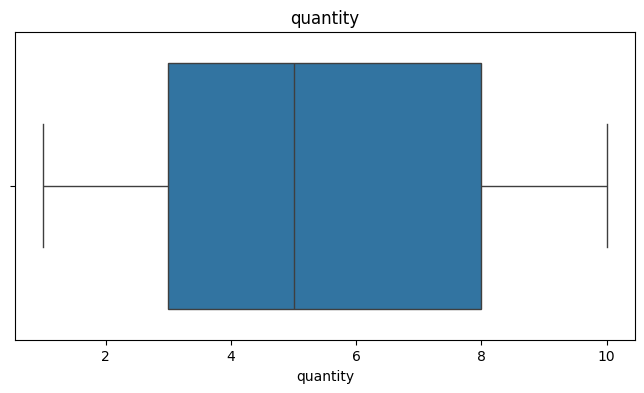

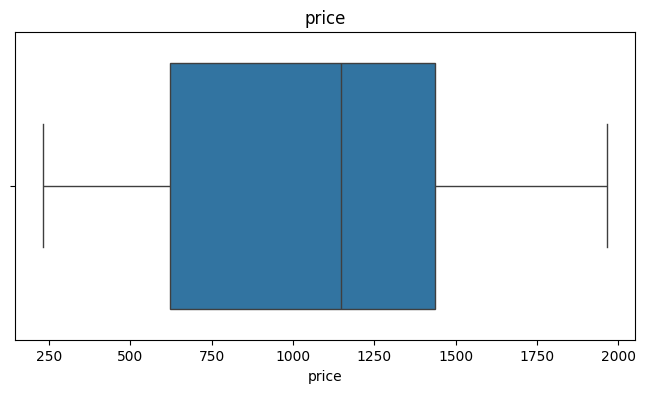

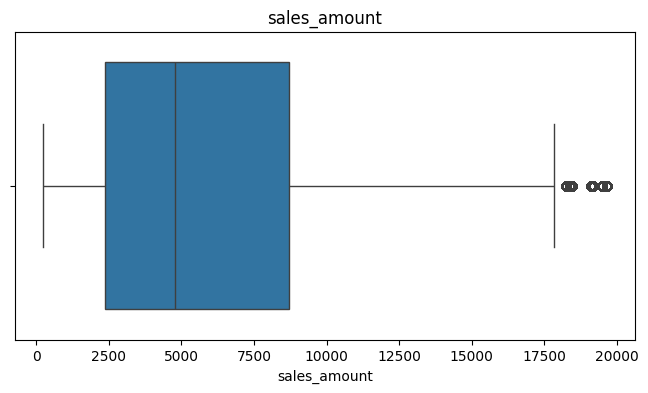

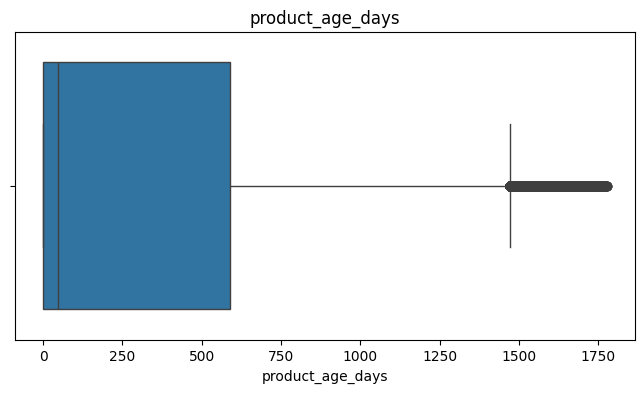

In [29]:
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

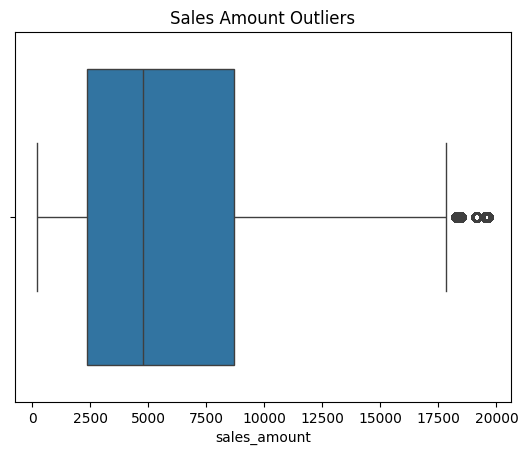

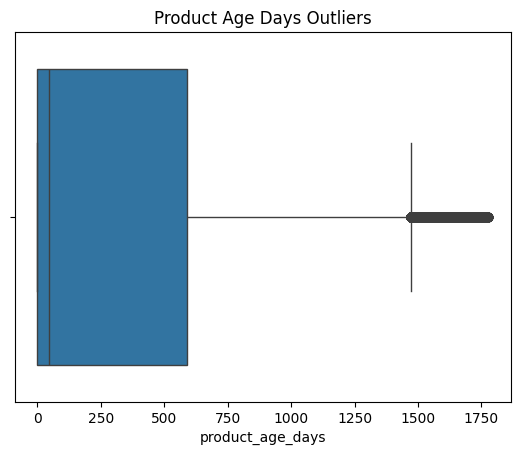

In [30]:
sns.boxplot(x=df['sales_amount'])
plt.title("Sales Amount Outliers")
plt.show()

sns.boxplot(x=df['product_age_days'])
plt.title("Product Age Days Outliers")
plt.show()

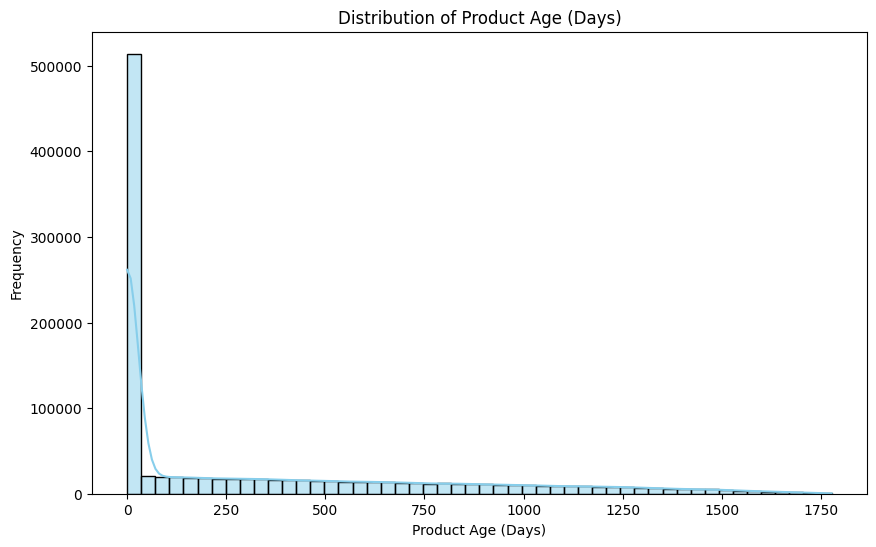

In [32]:
plt.figure(figsize=(10,6))
sns.histplot(df['product_age_days'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Product Age (Days)')
plt.xlabel('Product Age (Days)')
plt.ylabel('Frequency')
plt.show()

In [33]:
df['sales_amount'].corr(df['product_age_days'])

np.float64(0.031639104612208035)

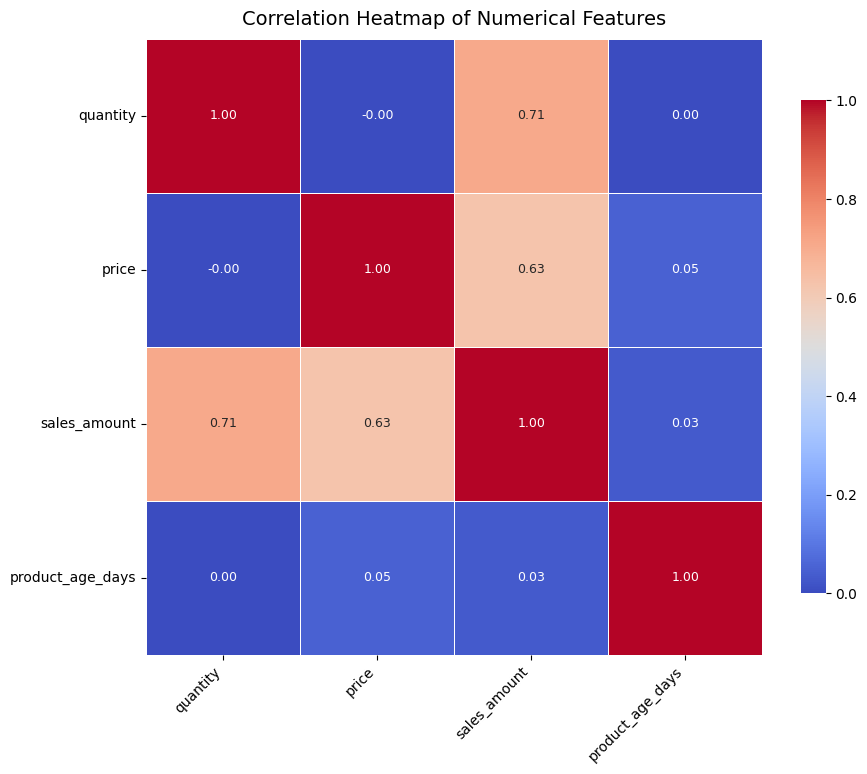

In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True,
            cbar_kws={"shrink": 0.8}, annot_kws={"size": 9})
plt.title("Correlation Heatmap of Numerical Features", fontsize=14, pad=10)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()
